# Recursion
## Introduction

Recursion is a technique for solving problems where the solution to a particular problem depends on the solution to a smaller instance of the same problem. 

Consider the problem of calculating $\mathtt{2^5}$. Let's assume to calculate this, you need to do one multiplication after another. That's $2 * 2 * 2 * 2 * 2$. We know that $2^5 = 2 * 2^4$. If we know the value of $2^4$, we can easily calculate $2^5$.

We can use recursion to solve this problem, since the solution to the original problem ($2^n$) depends on the solution to a smaller instance ($2^{n-1}$) of the same problem. The recursive solution is to calculate $2 * 2^{n-1}$ for all n that is greater than 0. If n is 0, return 1. We'll ignore all negative numbers.

Let's look at what the recursive steps would be for calculating $2^5$.

$2^5 = 2 * 2^4$

$2^5 = 2 * 2 * 2^3$

$2^5 = 2 * 2 * 2 * 2^2$

$2^5 = 2 * 2 * 2 * 2 * 2^1$

$2^5 = 2 * 2 * 2 * 2 * 2 * 2^0$

$2^5 = 2 * 2 * 2 * 2 * 2 * 1$

## Code
Let's look at the recursive function `power_of_2`, which calculates $2^n$.

In [3]:
def power_of_2(n):
    if n == 0:
        return 1
    
    return 2 * power_of_2(n - 1)

print(power_of_2(5))

32


## Call Stack
Let's follow the [call stack](https://en.wikipedia.org/wiki/Call_stack) when calling `power_of_2(5)`:

First `power_of_2(5)` is called.

Then `power_of_2(5)` calls `power_of_2(4)`

Then `power_of_2(4)` calls `power_of_2(3)`

...

Then `power_of_2(1)` calls `power_of_2(0)`

At this point, the call stack will look something like this:
```
  ...
  File "<ipython-input-27-9e8459c7465f>", line 5, in power_of_2
    return 2 * power_of_2(n - 1)
  File "<ipython-input-27-9e8459c7465f>", line 5, in power_of_2
    return 2 * power_of_2(n - 1)
  File "<ipython-input-27-9e8459c7465f>", line 5, in power_of_2
    return 2 * power_of_2(n - 1)
  File "<ipython-input-27-9e8459c7465f>", line 5, in power_of_2
    return 2 * power_of_2(n - 1)
  File "<ipython-input-27-9e8459c7465f>", line 3, in power_of_2
    return 1
```
Let's look at a cleaner view of the stack:
```
...
    -> power_of_2(5)
        -> power_of_2(4)
            -> power_of_2(3)
                -> power_of_2(2)
                    -> power_of_2(1)
                        -> power_of_2(0)
```
Each function is waiting on the function it called to complete. So, `power_of_2(5)` is waiting for `power_of_2(4)`, `power_of_2(4)` is waiting for `power_of_2(3)`, etc..

The function `power_of_2(0)` will return $1$

Using the 1 returned from `power_of_2(0)`, `power_of_2(1)` will return $2 * 1$

Using the 2 returned from `power_of_2(1)`, `power_of_2(2)` will return $2 * 2$

...


Using the 16 returned from `power_of_2(4)`, `power_of_2(5)` will return $2 * 16$

Finally, the result of $2^5$ is returned! $2^5 = 2 * 2^4 = 2 * 16 = 32$

## Gotchas
When using recursion, there are a few things to look out for that you don't have to worry about when running a loop (iteratively). Let's go over a few of those items.

### Call Stack
We went over an example of the call stack when calling `power_of_2(5)` above. In this section, we'll cover the limitations of recursion on a call stack. Run the cell below to create a really large stack. It should raise the error `RecursionError: maximum recursion depth exceeded in comparison`.

In [4]:
print(power_of_2(10000))

RecursionError: maximum recursion depth exceeded in comparison

Python has a limit on the depth of recursion to prevent a [stack overflow](https://en.wikipedia.org/wiki/Stack_overflow). However, some compilers will turn [tail-recursive functions](https://en.wikipedia.org/wiki/Recursion_(computer_science)#Tail-recursive_functions) into an iterative loop to prevent recursion from using up the stack. Since Python's compiler doesn't do this, you'll have to watch out for this limit.
### Slicing
Let's look at recursion on arrays and how you can run into the problem of slicing the array. If you haven't heard the term slicing, it's the operation of taking a subset of some data. For example, the list `a` can be sliced using the following operation: `a[start:stop]`. This will return a new list from index `start` (inclusive) to index `stop` (exclusive).

Let's look at an example of a recursive function that takes the sum of all numbers in an array. For example, the array of `[5, 2, 9, 11]` would sum to 27 (5 + 2 + 9 + 11).

In [1]:
def sum_array(array):
    # Base Case
    if len(array) == 1:
        return array[0]
    
    return array[0] + sum_array(array[1:])

arr = [1, 2, 3, 4]
print(sum_array(arr))

10


Looking at this, you might think it has a running time of O($n$), but that isn't correct due to the slice operation `array[1:]`. This operation will take O($k$) time to run where $k$ is the number of elements to copy. So, this function is actually O($k*n$) running time complexity and O($k*n$) space complexity.

To visualize this, let's plot the time it takes to slice.

[]

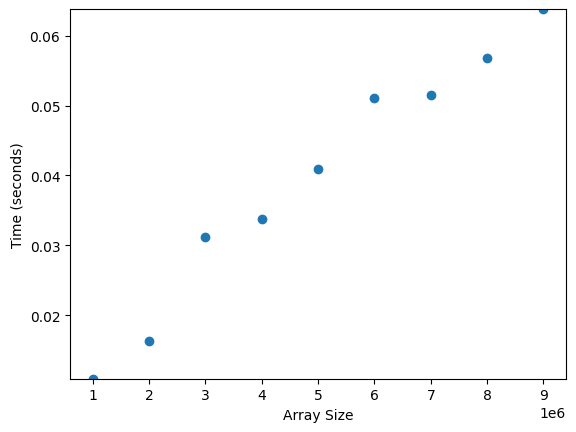

In [2]:
import matplotlib.pyplot as plt
import statistics
import time
%matplotlib inline

n_steps = 10
step_size = 1000000
array_sizes = list(range(step_size, n_steps*step_size, step_size))
big_array = list(range(n_steps*step_size))
times = []

# Calculate the time it takes for the slice function to run with different sizes of k
for array_size in array_sizes:
    start_time = time.time()
    big_array[:array_size]
    times.append(time.time() - start_time)

# Graph the results
plt.scatter(x=array_sizes, y=times)
plt.ylim(top=max(times), bottom=min(times))
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.plot()

In [3]:
def sum_array_index(array, index):
    # Base Cases
    if len(array) - 1 == index:
        return array[index]
    
    return array[index] + sum_array_index(array, index + 1)

arr = [1, 2, 3, 4]
print(sum_array_index(arr, 0))

10


[]

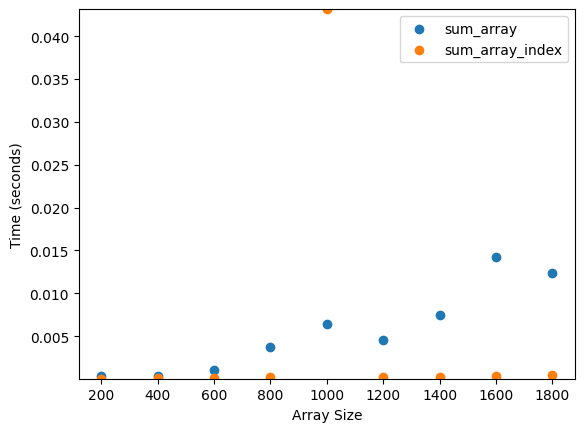

In [4]:
import matplotlib.pyplot as plt
import statistics
import time

n_steps = 10
step_size = 200
array_sizes = list(range(step_size, n_steps*step_size, step_size))
big_array = list(range(n_steps*step_size))
sum_array_times = []
sum_array_index_times = []

for array_size in array_sizes:
    subset_array = big_array[:array_size]
    
    start_time = time.time()
    sum_array(subset_array)
    sum_array_times.append(time.time() - start_time)
    
    start_time = time.time()
    sum_array_index(subset_array, 0)
    sum_array_index_times.append(time.time() - start_time)
    
    
plt.scatter(x=array_sizes, y=sum_array_times, label='sum_array')
plt.scatter(x=array_sizes, y=sum_array_index_times, label='sum_array_index')
plt.ylim(
    top=max(sum_array_times + sum_array_index_times),
    bottom=min(sum_array_times + sum_array_index_times))
plt.legend()
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.plot()

As you can see, the function `sum_array` is a polynomial and `sum_array_index` is linear as we predicted.

However, in our pursuit to use recursion we actually made things worse. Let's look at an iterative solution to this problem:

In [5]:
def sum_array_iter(array):
    result = 0
    
    for x in array:
        result += x
    
    return result

arr = [1, 2, 3, 4]
print(sum_array_iter(arr))

10


The `sum_array_iter` function is a lot more straightforward than the two recursive functions, which is important. Second, to help ensure an answer that is correct and bug free, you generally want to pick the solution that is more readable. In some cases recursion is more readable and in some cases iteration is more readable. As you gain experience reading other people’s code, you’ll get an intuition for code readability.